In [120]:
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv('../data/data.csv')
df.head()

,Province/State,City/County/Borough/Region,Date,Total Death,Total Confirmed
0,Florida,Sumter,2020-01-31,0,0
1,Georgia,Houston,2020-01-31,0,0
2,Georgia,Pickens,2020-01-31,0,0
3,Georgia,Washington,2020-01-31,0,0
4,Idaho,Adams,2020-01-31,0,0


In [122]:
df_last_date = df[df['Date'] == '2022-03-10']

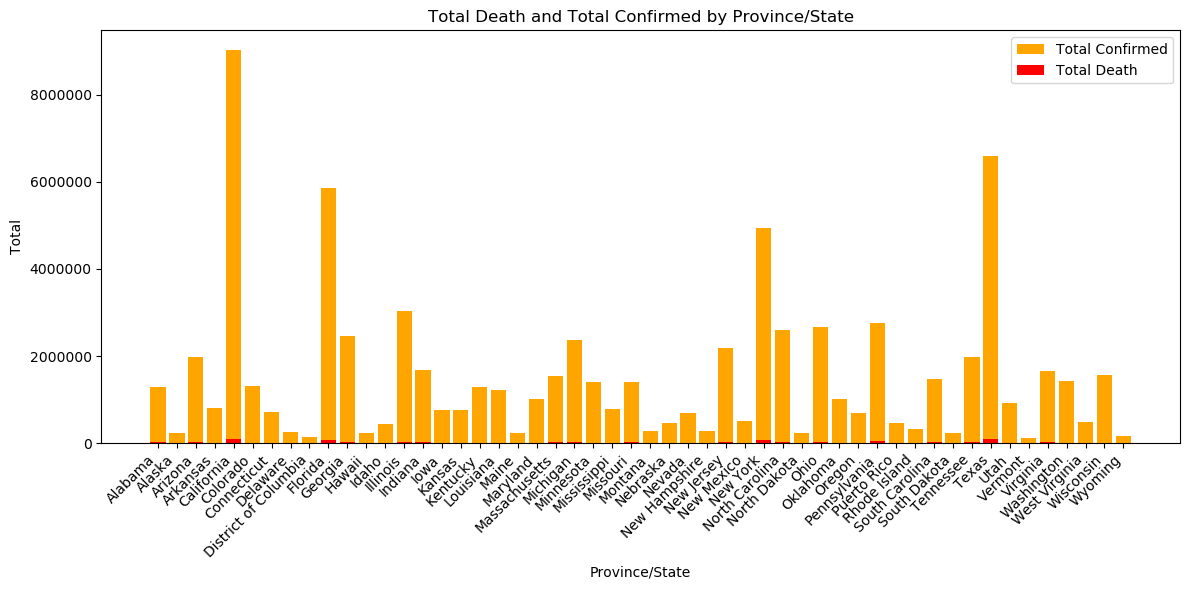

In [123]:
state_df = df_last_date.groupby('Province/State')[['Total Death', 'Total Confirmed']].sum().reset_index()

plt.figure(figsize=(12, 6))

plt.bar(state_df['Province/State'], state_df['Total Confirmed'], color='orange', label='Total Confirmed')
plt.bar(state_df['Province/State'], state_df['Total Death'], color='red', label='Total Death')

plt.xlabel('Province/State')
plt.ylabel('Total')
plt.title('Total Death and Total Confirmed by Province/State')

plt.xticks(rotation=45, ha="right")

plt.legend()

plt.tight_layout()
plt.show()

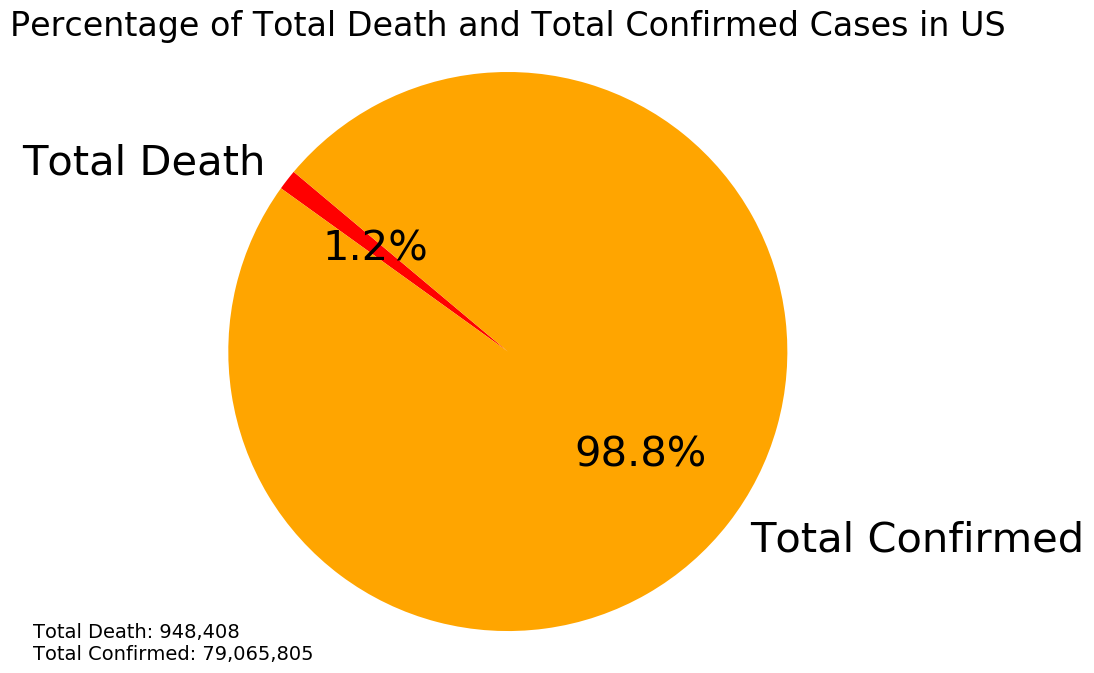

In [124]:
total_deaths = state_df['Total Death'].sum()
total_confirmed = state_df['Total Confirmed'].sum()

formatted_total_deaths = '{:,}'.format(total_deaths)
formatted_total_confirmed = '{:,}'.format(total_confirmed)

labels = ['Total Death', 'Total Confirmed']
sizes = [total_deaths, total_confirmed]
colors = ['red', 'orange']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda x: '{:.1f}%'.format(x), startangle=140, textprops={'fontsize': 30})

title_text = f'Total Death: {formatted_total_deaths}\nTotal Confirmed: {formatted_total_confirmed}'
plt.title('Percentage of Total Death and Total Confirmed Cases in US', fontsize=24)

total_text = f'Total Death: {formatted_total_deaths}\nTotal Confirmed: {formatted_total_confirmed}'
plt.text(-1.7, -1.1, total_text, fontsize=14)

plt.axis('equal')
plt.show()